In [1]:
%load_ext autoreload
%autoreload 2
import sys;sys.path.append('modules')
from utils import *

%matplotlib inline    
import matplotlib.pyplot as plt

# Info about fill

In [2]:
fill_number = 6711
fill_info = get_fill_info(fill_number)

# Tunes

In [3]:
tune_data = get_HS_tunes(fill_number)

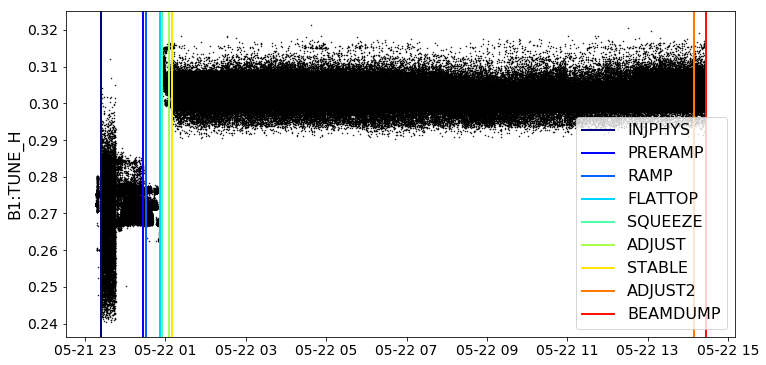

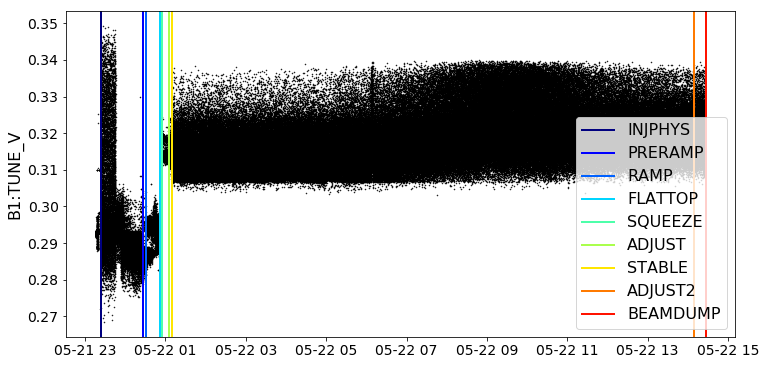

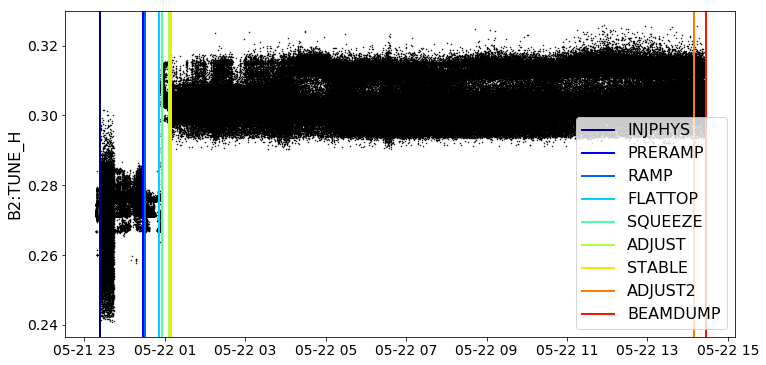

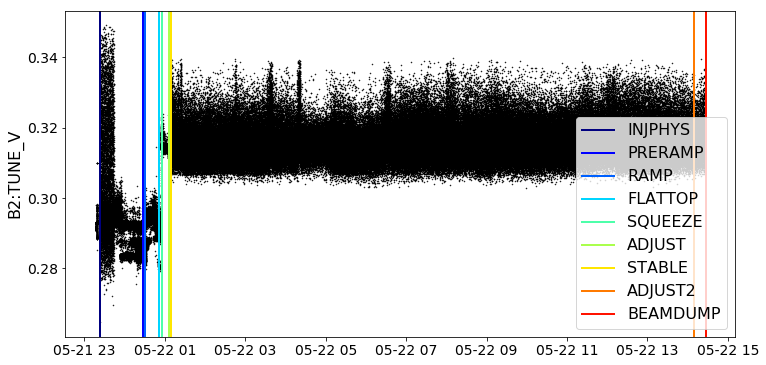

In [4]:
plot_tune_evolution(tune_data, fill_info)

# 50 Hz lines crossing between INJECTION & STABLE

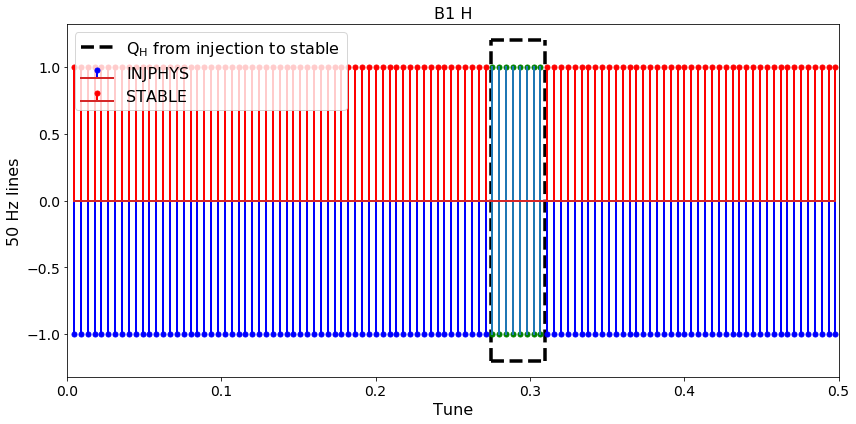

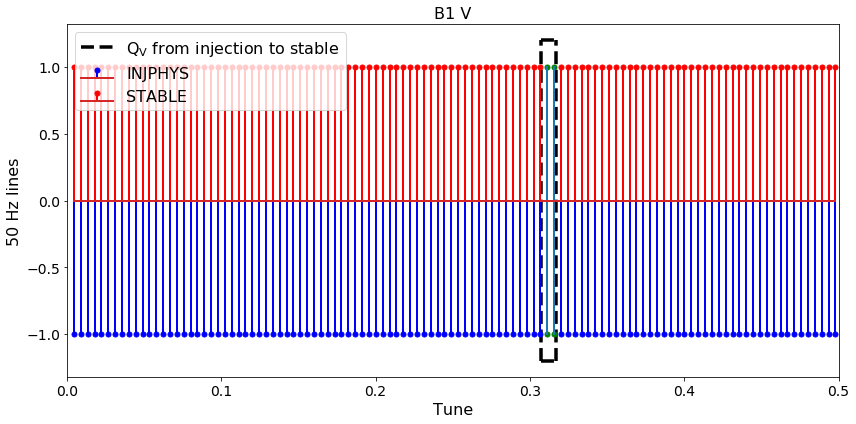

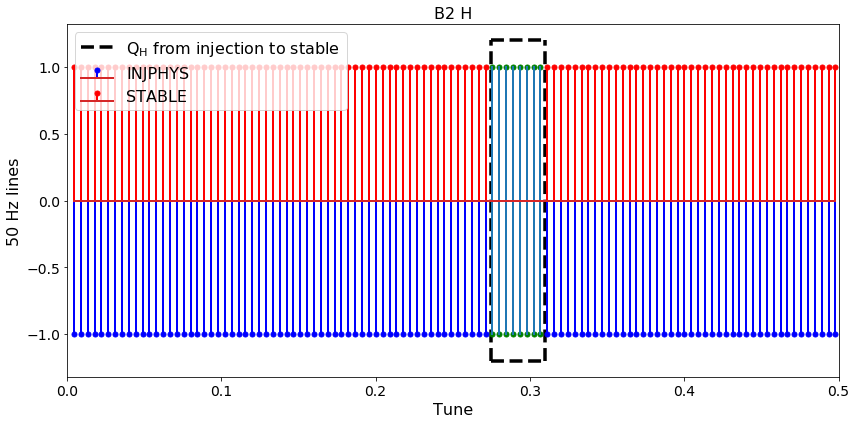

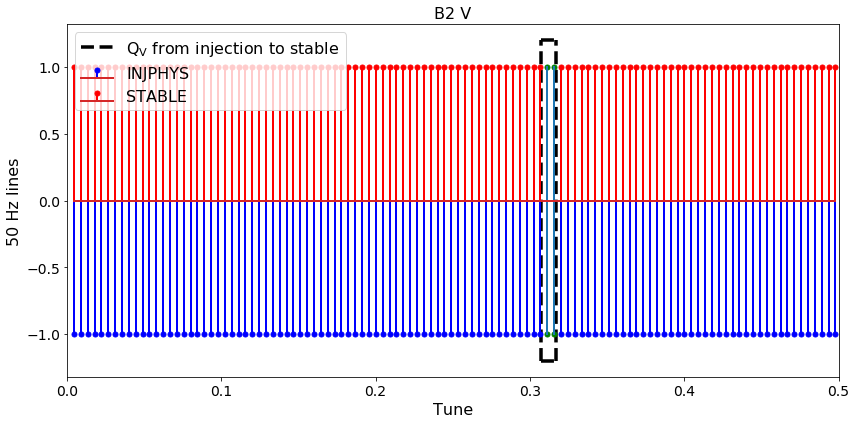

In [5]:
modes = ['INJPHYS','STABLE']
time = {}
for i in modes:
  time[i] = (fill_info[i]['startTime'],fill_info[i]['startTime']+np.timedelta64(5, 's') )

df = get_data(modes, time)
plot_50(df, qxmin=0.275, qxmax=0.31, qymin=0.307, qymax=0.317)


In [6]:
#df.B1.V.crossing
#df.B1.H.crossing
#df.B2.V.crossing
df.B2.H.crossing

beam  horizontal  horizontal #   status
0   B2    0.275666            61  INJPHYS
1   B2    0.280113            62  INJPHYS
2   B2    0.284559            63  INJPHYS
3   B2    0.289005            64  INJPHYS
4   B2    0.293451            65  INJPHYS
5   B2    0.297897            66  INJPHYS
6   B2    0.302344            67  INJPHYS
7   B2    0.306790            68  INJPHYS
0   B2    0.275666            61   STABLE
1   B2    0.280112            62   STABLE
2   B2    0.284558            63   STABLE
3   B2    0.289004            64   STABLE
4   B2    0.293451            65   STABLE
5   B2    0.297897            66   STABLE
6   B2    0.302343            67   STABLE
7   B2    0.306789            68   STABLE

# TbT

In [7]:
modes = ['INJPHYS', 'RAMP','FLATTOP','SQUEEZE','STABLE']
time = {}
for i in modes:
  if i=='PRERAMP' or i=='RAMP' or i=='SQUEEZE' or i=='FLATTOP':
    time[i] = ('all', fill_number)
  elif i == 'STABLE':
    time[i] = (fill_info[i]['startTime'],fill_info[i]['startTime']+np.timedelta64(10, 'm') )
  elif i=='INJPHYS':
    time[i] = (fill_info[i]['endTime']-np.timedelta64(10, 'm') ,fill_info[i]['endTime'] )
    
df = get_data(modes, time)

# Organize 50 Hz h by FFT

In [9]:
get_fft(df)

B1 H SQUEEZE
B1 H RAMP
B1 H FLATTOP
B1 H INJPHYS
B1 H STABLE
B1 V SQUEEZE
B1 V RAMP
B1 V FLATTOP
B1 V INJPHYS
B1 V STABLE
B2 H SQUEEZE
B2 H RAMP
B2 H FLATTOP
B2 H INJPHYS
B2 H STABLE
B2 V SQUEEZE
B2 V RAMP
B2 V FLATTOP
B2 V INJPHYS
B2 V STABLE
B1
H
V
B2
H
V


In [11]:
print [f for f in df.B1.V.fft.RAMP.keys() if f.startswith('h')]


['h47', 'h46', 'h45', 'h44', 'h43', 'h42', 'h41', 'h40', 'h49', 'h48', 'h54', 'h55', 'h56', 'h57', 'h50', 'h51', 'h52', 'h53', 'h58', 'h59', 'h110', 'h111', 'h69', 'h68', 'h61', 'h60', 'h63', 'h62', 'h65', 'h64', 'h67', 'h66', 'h78', 'h79', 'h76', 'h77', 'h74', 'h75', 'h72', 'h73', 'h70', 'h71', 'h8', 'h9', 'h2', 'h3', 'h0', 'h1', 'h6', 'h7', 'h4', 'h5', 'h105', 'h104', 'h106', 'h107', 'h83', 'h82', 'h81', 'h80', 'h87', 'h86', 'h85', 'h84', 'h101', 'h89', 'h88', 'h109', 'h108', 'h100', 'h103', 'h102', 'h18', 'h19', 'h10', 'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h90', 'h91', 'h92', 'h93', 'h94', 'h95', 'h96', 'h97', 'h98', 'h99', 'h29', 'h28', 'h25', 'h24', 'h27', 'h26', 'h21', 'h20', 'h23', 'h22', 'h32', 'h33', 'h30', 'h31', 'h36', 'h37', 'h34', 'h35', 'h38', 'h39']


# Heatmaps of 50Hz lines

B1 H FLATTOP
(112, 112)


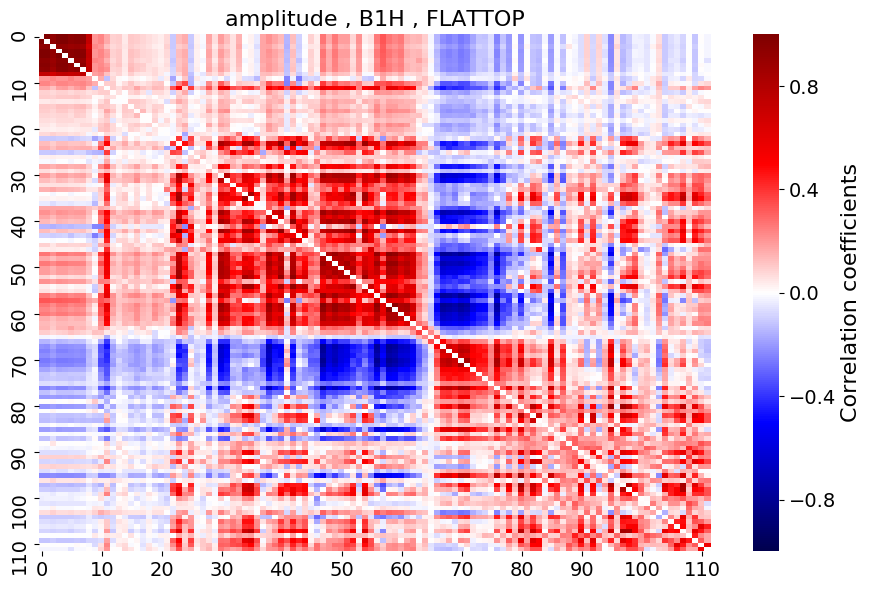

300  strongest absolute correlations
Top Absolute Correlations
0   1      0.999559
3   4      0.998456
1   3      0.997622
0   3      0.996598
1   4      0.995483
0   4      0.993973
4   6      0.972995
3   6      0.969902
47  58     0.968002
1   6      0.964878
23  42     0.962710
0   6      0.961997
4   7      0.961902
    5      0.958603
3   7      0.957071
58  59     0.957028
3   5      0.954106
6   7      0.951362
1   5      0.951338
0   5      0.949377
1   7      0.947706
0   7      0.943996
1   2      0.937587
40  42     0.937468
0   2      0.936434
42  52     0.935267
56  58     0.933844
5   6      0.928894
47  59     0.927281
2   3      0.926836
             ...   
34  51     0.668458
48  62     0.667930
95  107    0.667834
52  61     0.666313
69  71     0.663827
40  62     0.663143
39  59     0.662925
60  76     0.661002
48  54     0.660763
30  39     0.660266
44  52     0.659851
38  69     0.659443
95  98     0.658892
51  62     0.658492
50  60     0.657983
31  56     0.6576

ValueError: too many values to unpack

In [40]:
corr, strongest, bins, pval = heatmaps(df, status=['FLATTOP'], beam=['B1'], plane=['H'], mode='amplitude')

# Threshold in 50Hz heatmap

B1 H FLATTOP
(112, 112)


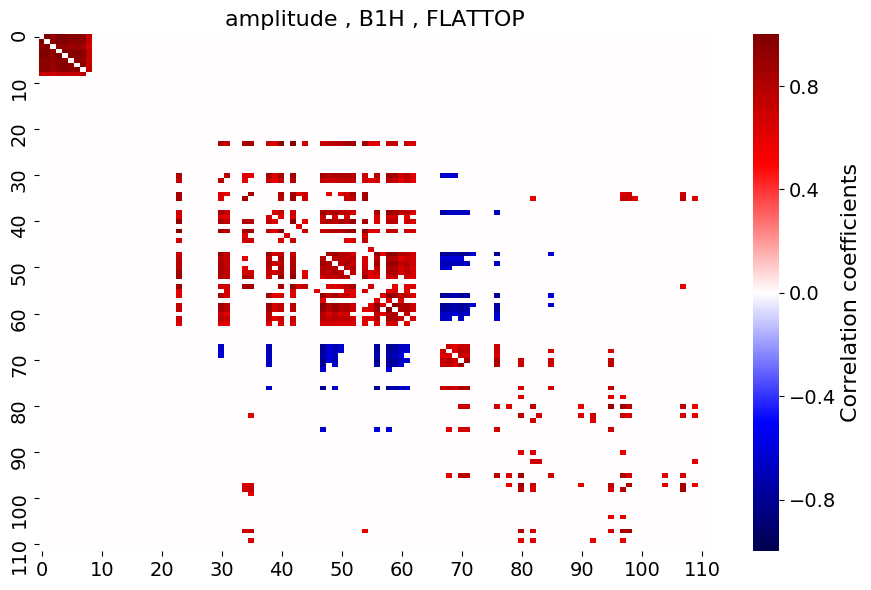

Threshold set to  0.6
Top Absolute Correlations
0   1      0.999559
3   4      0.998456
1   3      0.997622
0   3      0.996598
1   4      0.995483
0   4      0.993973
4   6      0.972995
3   6      0.969902
47  58     0.968002
1   6      0.964878
23  42     0.962710
0   6      0.961997
4   7      0.961902
    5      0.958603
3   7      0.957071
58  59     0.957028
3   5      0.954106
6   7      0.951362
1   5      0.951338
0   5      0.949377
1   7      0.947706
0   7      0.943996
1   2      0.937587
40  42     0.937468
0   2      0.936434
42  52     0.935267
56  58     0.933844
5   6      0.928894
47  59     0.927281
2   3      0.926836
             ...   
97  109    0.613247
48  69     0.613104
80  90     0.612970
58  72     0.612849
44  51     0.612610
35  99     0.611857
31  62     0.611812
57  60     0.611156
23  55     0.610120
90  97     0.609971
40  44     0.609739
55  61     0.609222
60  69     0.609129
56  85     0.608501
47  57     0.607444
55  58     0.607415
35  82     0

ValueError: too many values to unpack

In [42]:
corr, strongest = heatmaps(df, status=['FLATTOP'], beam=['B1'], plane=['H'], mode='amplitude', threshold=0.6)

# Zoom in specific region of the 50Hz heatmap

B1 H FLATTOP
(40, 40)


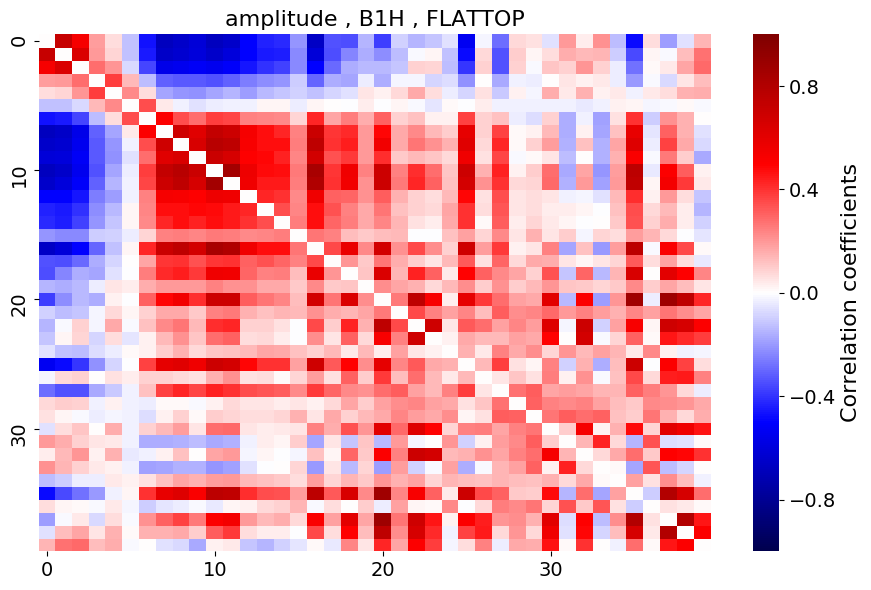

300  strongest absolute correlations
Top Absolute Correlations
20  37    0.878044
    35    0.871698
10  11    0.858876
    16    0.838115
11  16    0.809348
35  37    0.800735
37  38    0.797180
8   10    0.779641
10  35    0.761687
16  35    0.758525
8   11    0.756712
    16    0.753948
20  38    0.752323
    22    0.752166
11  35    0.743200
7   10    0.731440
0   1     0.720903
9   10    0.709209
7   16    0.708680
10  20    0.702968
7   11    0.700765
11  20    0.698183
22  32    0.697108
10  25    0.696561
25  35    0.696397
22  37    0.694710
16  25    0.692376
22  23    0.688663
7   8     0.687502
16  20    0.677019
            ...   
21  32    0.244648
6   12    0.244326
13  18    0.244109
28  32    0.244067
10  19    0.242523
21  35    0.241182
18  39    0.241070
9   15    0.240448
21  29    0.240350
22  28    0.239004
21  25    0.238744
14  20    0.237551
6   13    0.236606
13  15    0.235192
1   18    0.234643
28  31    0.234238
2   15    0.233145
28  36    0.233115
15  27

In [41]:
corr, strongest, bins_tot = heatmaps(df, status=['FLATTOP'], beam=['B1'], plane=['H'], mode='amplitude', harms = [60,100])

# Organize specific bins by FFT

In [33]:
get_fft(df, [554, 909])

B1 H SQUEEZE
B1 H RAMP
B1 H FLATTOP
B1 H INJPHYS
B1 H STABLE
B1 V SQUEEZE
B1 V RAMP
B1 V FLATTOP
B1 V INJPHYS
B1 V STABLE
B2 H SQUEEZE
B2 H RAMP
B2 H FLATTOP
B2 H INJPHYS
B2 H STABLE
B2 V SQUEEZE
B2 V RAMP
B2 V FLATTOP
B2 V INJPHYS
B2 V STABLE
B1
H
V
B2
H
V


In [34]:
print [f for f in df.B1.H.fft.FLATTOP.keys() if f.startswith('f')]
#print [f for f in df.B1.V.fft.RAMP.keys() if f.startswith('h')]
#print df.B1.V.fft.RAMP.h48
#clean_fft(df, search = 'f')

['f169', 'f168', 'f161', 'f160', 'f163', 'f162', 'f165', 'f164', 'f167', 'f166', 'f310', 'f311', 'f118', 'f119', 'f114', 'f115', 'f116', 'f117', 'f110', 'f111', 'f112', 'f113', 'f318', 'f319', 'f341', 'f340', 'f343', 'f342', 'f345', 'f344', 'f347', 'f346', 'f349', 'f348', 'f187', 'f186', 'f185', 'f184', 'f183', 'f182', 'f181', 'f180', 'f189', 'f188', 'f334', 'f335', 'f336', 'f337', 'f239', 'f238', 'f332', 'f333', 'f235', 'f234', 'f237', 'f236', 'f231', 'f230', 'f233', 'f232', 'f150', 'f151', 'f152', 'f153', 'f154', 'f155', 'f156', 'f157', 'f158', 'f159', 'f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f271', 'f270', 'f273', 'f272', 'f275', 'f274', 'f277', 'f276', 'f279', 'f278', 'f41', 'f40', 'f43', 'f42', 'f45', 'f44', 'f47', 'f46', 'f49', 'f48', 'f208', 'f209', 'f217', 'f216', 'f54', 'f213', 'f212', 'f211', 'f210', 'f219', 'f109', 'f108', 'f107', 'f106', 'f105', 'f59', 'f103', 'f102', 'f101', 'f100', 'f327', 'f326', 'f323', 'f322', 'f240', 'f241', 'f242', 'f243', 'f244',

B1 H FLATTOP
(355, 355)


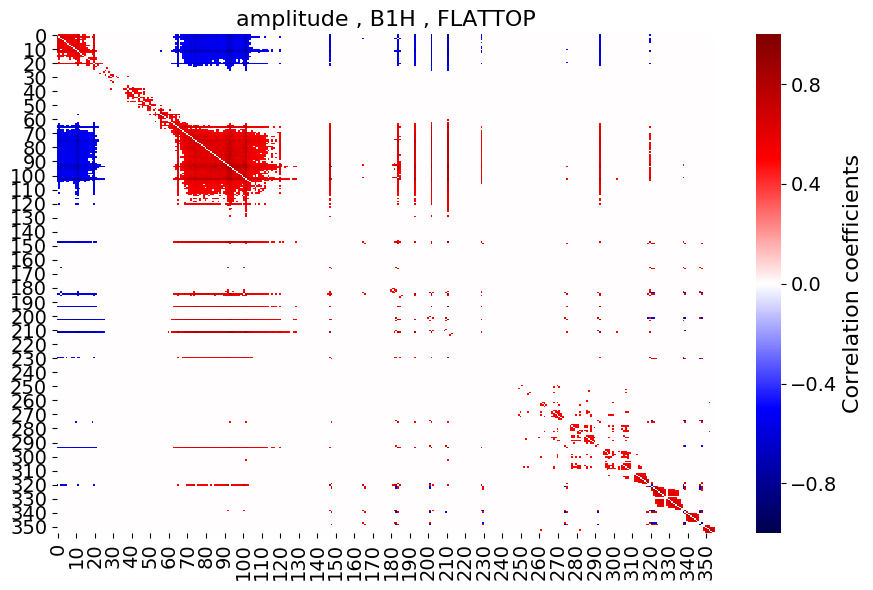

Threshold set to  0.5
Top Absolute Correlations
93   102    0.911661
102  211    0.911186
93   202    0.903061
184  202    0.893007
102  202    0.891642
93   211    0.891558
202  211    0.891386
183  338    0.878044
321  339    0.875107
183  320    0.871698
93   94     0.862686
     184    0.862603
321  322    0.859233
92   101    0.858876
347  348    0.839923
92   147    0.838115
94   211    0.837266
11   211    0.835808
75   102    0.834584
321  348    0.833683
102  184    0.833420
92   211    0.828626
322  323    0.826346
92   94     0.824971
193  211    0.823431
211  293    0.822125
202  293    0.819840
75   93     0.818209
147  211    0.817646
75   202    0.814111
              ...   
261  352    0.501070
83   110    0.501065
268  307    0.500954
86   116    0.500859
8    13     0.500764
254  307    0.500763
12   109    0.500734
297  309    0.500719
105  229    0.500626
93   124    0.500607
323  333    0.500593
280  288    0.500574
254  255    0.500567
17   18     0.500546
288  30

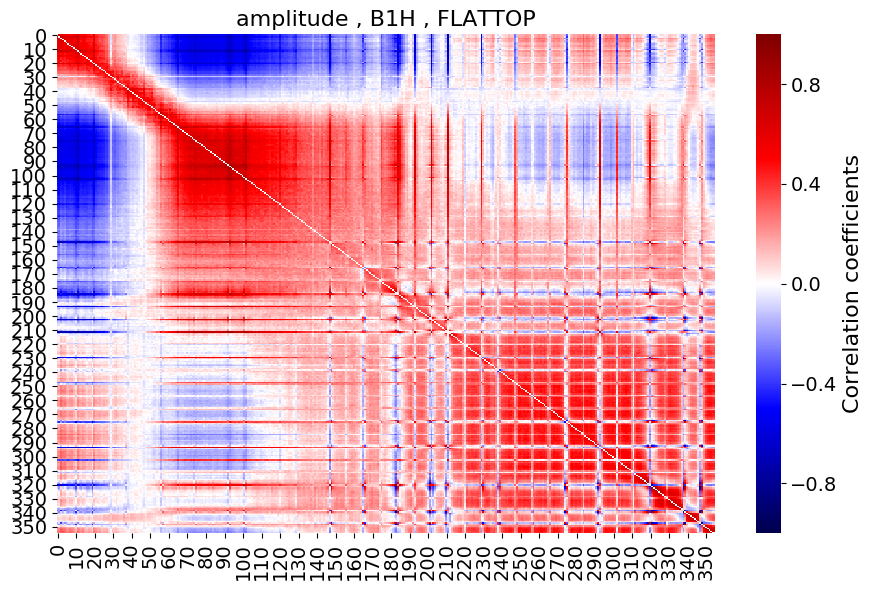

300  strongest absolute correlations
Top Absolute Correlations
93   102    0.911661
102  211    0.911186
93   202    0.903061
184  202    0.893007
102  202    0.891642
93   211    0.891558
202  211    0.891386
183  338    0.878044
321  339    0.875107
183  320    0.871698
93   94     0.862686
     184    0.862603
321  322    0.859233
92   101    0.858876
347  348    0.839923
92   147    0.838115
94   211    0.837266
11   211    0.835808
75   102    0.834584
321  348    0.833683
102  184    0.833420
92   211    0.828626
322  323    0.826346
92   94     0.824971
193  211    0.823431
211  293    0.822125
202  293    0.819840
75   93     0.818209
147  211    0.817646
75   202    0.814111
              ...   
92   183    0.702968
20   94     0.702934
92   98     0.702785
351  352    0.702631
65   93     0.702385
74   94     0.701875
94   293    0.701797
319  339    0.701708
94   193    0.701451
2    147    0.701213
69   202    0.701106
65   101    0.700765
83   94     0.700714
99   102    0

In [44]:
corr2, strongest2, bins_tot2 = heatmaps(df, status=['FLATTOP'], beam=['B1'], plane=['H'], mode='amplitude', search='f', threshold = 0.5)
corr2, strongest2, bins_tot2 = heatmaps(df, status=['FLATTOP'], beam=['B1'], plane=['H'], mode='amplitude', search='f')
#clean_fft(df)
#clean_fft(df, search = 'f')
#print [f for f in df.B1.V.fft.RAMP.keys() if f.startswith('h')]

# Time evolution of strongest correlated 50Hz lines

B1 H SQUEEZE
B1 H RAMP
B1 H FLATTOP
B1 H INJPHYS
B1 H STABLE
B1 V SQUEEZE
B1 V RAMP
B1 V FLATTOP
B1 V INJPHYS
B1 V STABLE
B2 V SQUEEZE
B2 V RAMP
B2 V FLATTOP
B2 V INJPHYS
B2 V STABLE


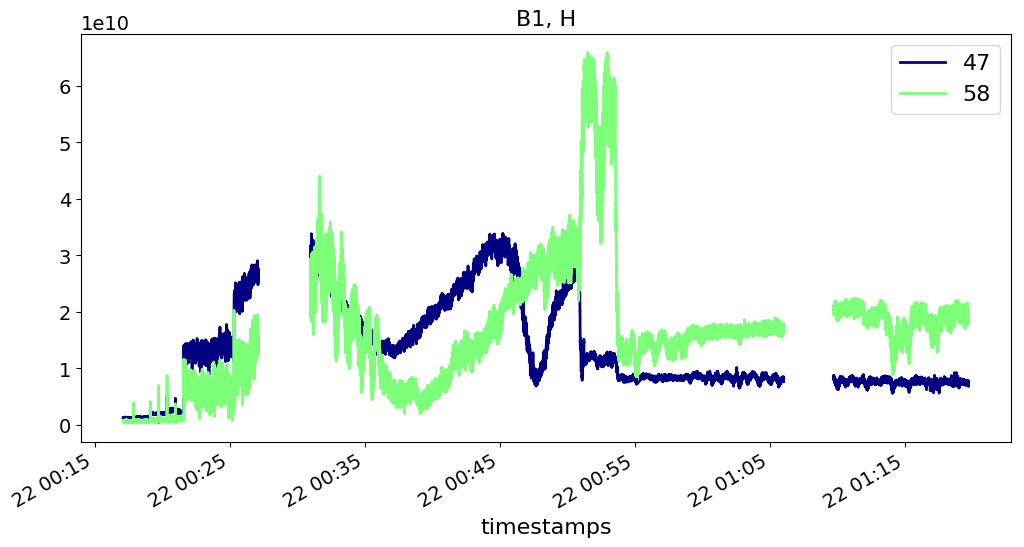

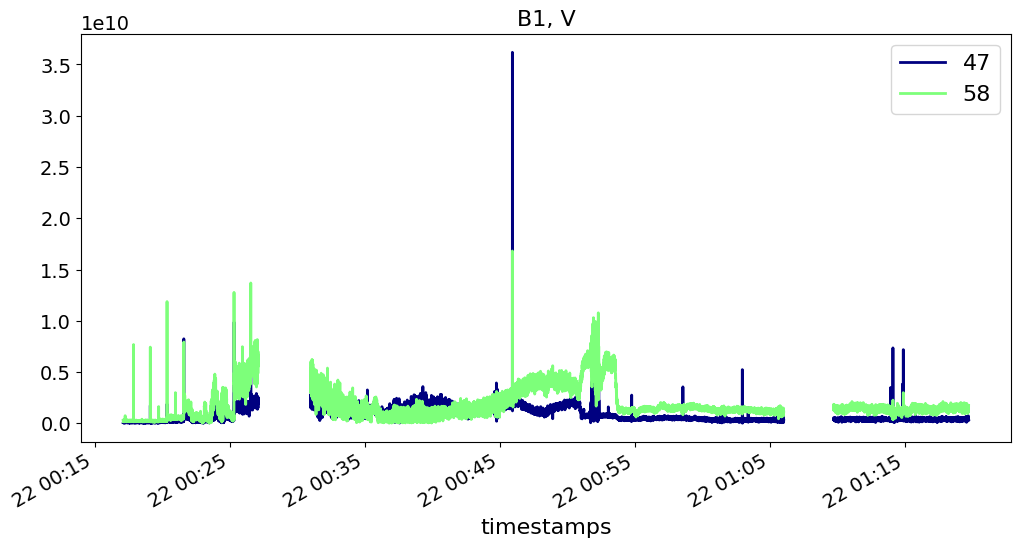

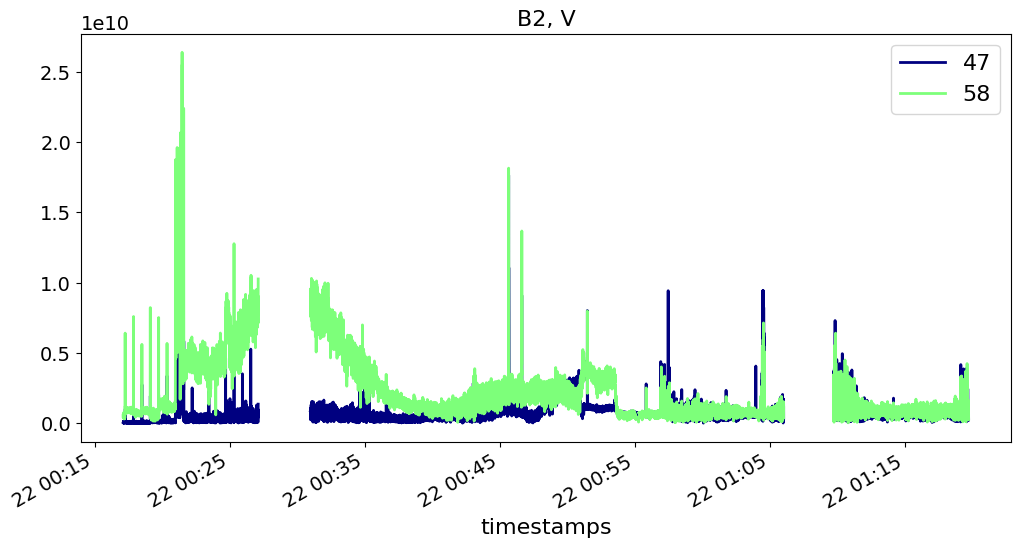

In [53]:
plt.close('all')
hs =[47, 58]

plot_harm(hs, df, normalise=False, search='h')
plt.show()

B1 H SQUEEZE
B1 H RAMP
B1 H FLATTOP
B1 H INJPHYS
B1 H STABLE
B1 V SQUEEZE
B1 V RAMP
B1 V FLATTOP
B1 V INJPHYS
B1 V STABLE
B2 V SQUEEZE
B2 V RAMP
B2 V FLATTOP
B2 V INJPHYS
B2 V STABLE


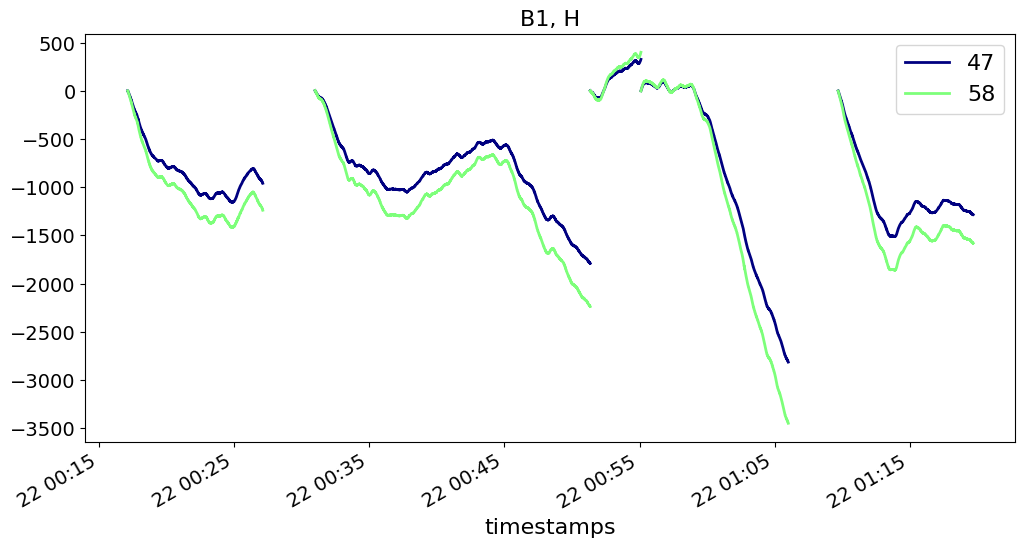

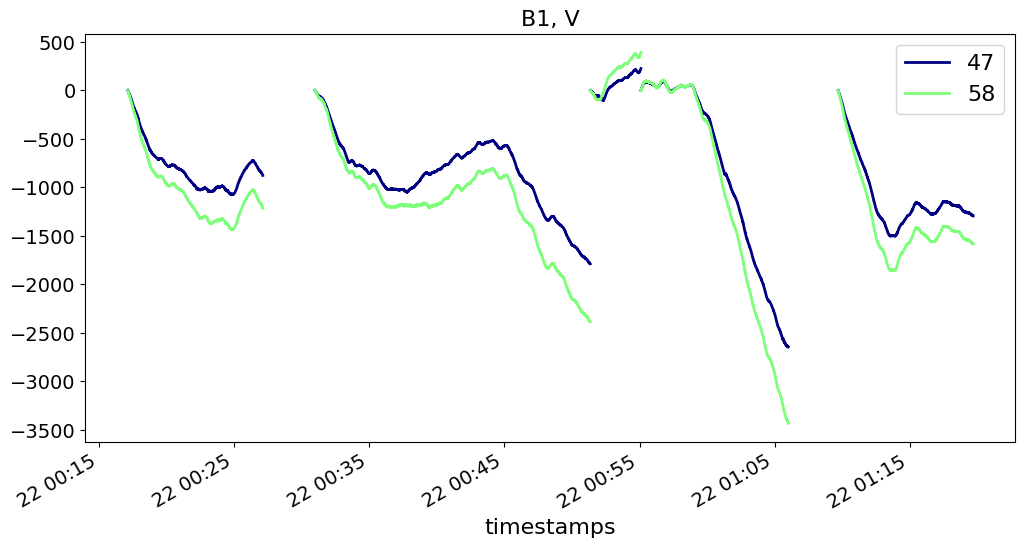

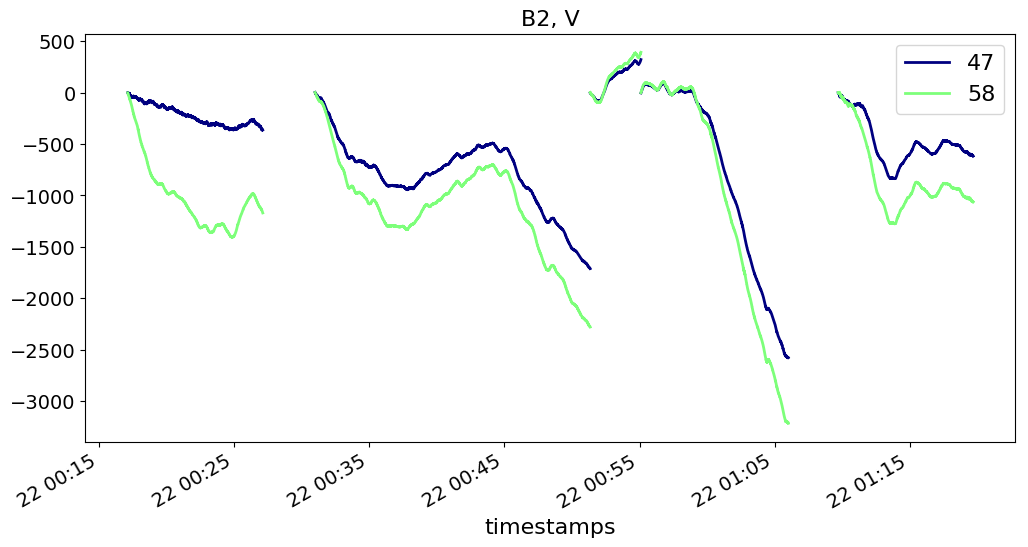

In [54]:
plt.close('all')
hs =[47, 58]

plot_harm(hs, df, normalise=False, search='h', mode='angle')
plt.show()

# Correlation table

In [30]:
def color_max(val):
    if val >0.7:
        color='red'
    elif val<-0.7:
        color='blue'
    else:
        color = 'black'
    return 'color: %s' % color
style1 = corr['B1_H_FLATTOP_amplitude'].style.applymap(color_max)
style1